In [1]:
import ultralytics
from ultralytics import YOLO

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch    
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

In [3]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]

# Just import these 2 modules

In [4]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

# For the classification model

In [5]:
img = cv2.imread('1.house_hanam6087.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [6]:
model = YOLO('ca.pt') 

In [7]:
target_layers =[model.model.model[-2]]

### You may get an innaccurate output at first


0: 224x224 golden_retriever 0.41, Labrador_retriever 0.30, Great_Pyrenees 0.09, kuvasz 0.04, cocker_spaniel 0.03, 4.2ms
Speed: 0.3ms preprocess, 4.2ms inference, 10.9ms postprocess per image at shape (1, 3, 224, 224)


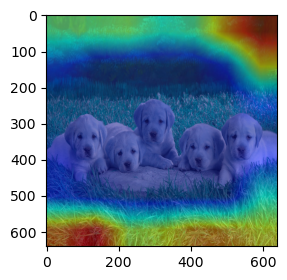

In [19]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

### SImply Re-running the cell will do the trick


0: 224x224 golden_retriever 0.41, Labrador_retriever 0.30, Great_Pyrenees 0.09, kuvasz 0.04, cocker_spaniel 0.03, 10.9ms
Speed: 0.8ms preprocess, 10.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


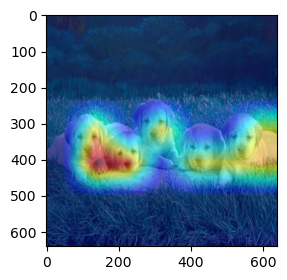

In [20]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

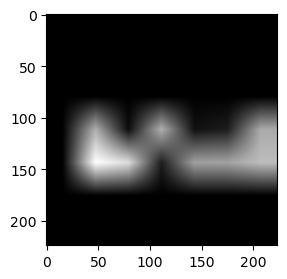

In [21]:
g_scale = cv2.resize(np.stack([grayscale_cam] * 3, axis=2), (224,224))

plt.imshow(g_scale, cmap='gray')
plt.show()

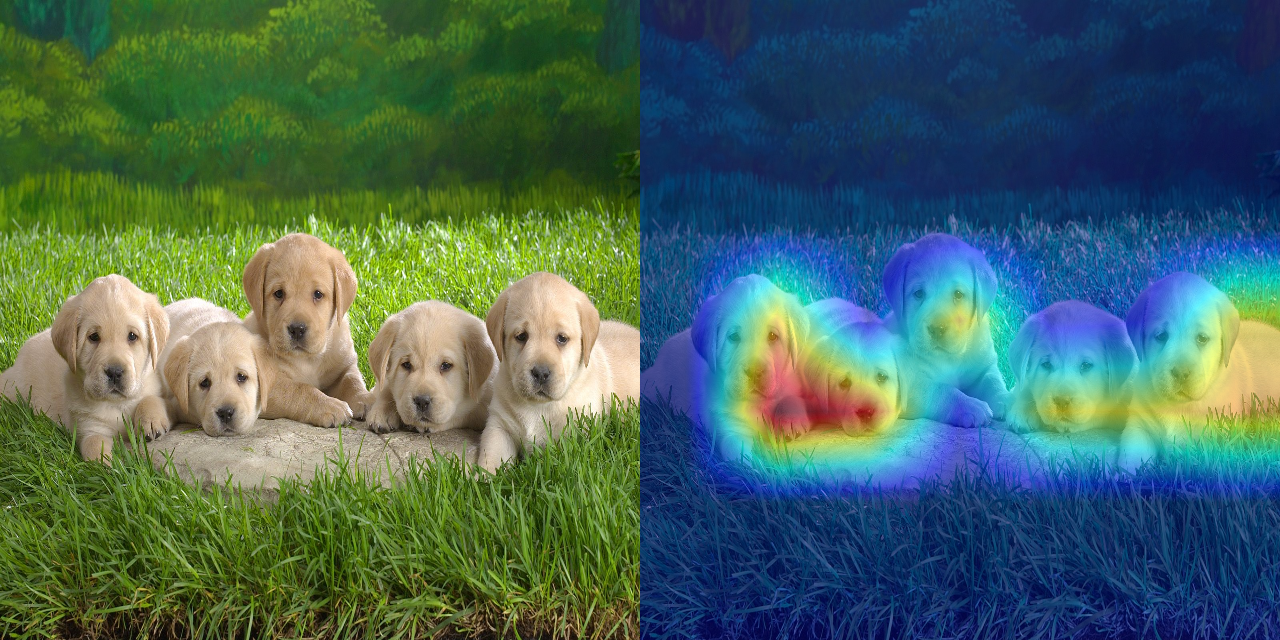

In [22]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))

# For the object detection model

In [256]:
model = YOLO('basic2.pt')

In [96]:
img = cv2.imread('all/crawling (60).jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [433]:
model = YOLO('basic5.pt')
img = cv2.imread('all/manager (280).jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

for i in [8,9,-2,-5,-3]:
    target_layers =[model.model.model[i]]  #8:12 #9:13, , 19, 22:18(basic), 25, -2, -5, -8
    cam = EigenCAM(model, target_layers,task='od')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
    cv2.imwrite(f'result/basic{i}.jpg', cv2.cvtColor(cam_image, cv2.COLOR_BGR2RGB))

Ultralytics YOLOv8.0.40  Python-3.8.16 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
custom_YOLOv8s summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

0: 640x640 1 Helmet, 2 Harnesss, 1 Lifeline, 8.0ms
Speed: 1.0ms pre-process, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Helmet, 2 Harnesss, 1 Lifeline, 8.0ms
Speed: 1.0ms pre-process, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


merge_before tensor([ 0,  5, 20, 23], device='cuda:0')
merge_before tensor([ 0,  5, 20, 23], device='cuda:0')



0: 640x640 1 Helmet, 2 Harnesss, 1 Lifeline, 8.0ms
Speed: 1.0ms pre-process, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Helmet, 2 Harnesss, 1 Lifeline, 8.0ms
Speed: 1.0ms pre-process, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


merge_before tensor([ 0,  5, 20, 23], device='cuda:0')
merge_before tensor([ 0,  5, 20, 23], device='cuda:0')



0: 640x640 1 Helmet, 2 Harnesss, 1 Lifeline, 9.0ms
Speed: 1.0ms pre-process, 9.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


merge_before tensor([ 0,  5, 20, 23], device='cuda:0')


In [427]:
model = YOLO('ca.pt')
img = cv2.imread('all/manager (280).jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

for i in [12,13,-2,-5,-3]:
    target_layers =[model.model.model[i]]  #8:12 #9:13, , 19, 22:18(basic), 25, -2, -5, -8
    cam = EigenCAM(model, target_layers,task='od')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
    cv2.imwrite(f'result/ca{i}.jpg', cv2.cvtColor(cam_image, cv2.COLOR_BGR2RGB))

Ultralytics YOLOv8.0.40  Python-3.8.16 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
custom_YOLOv8s_add_ca_backbone summary (fused): 208 layers, 11164887 parameters, 0 gradients, 28.5 GFLOPs

0: 640x640 1 Helmet, 3 Harnesss, 9.0ms
Speed: 2.0ms pre-process, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Helmet, 3 Harnesss, 10.0ms
Speed: 1.0ms pre-process, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


merge_before tensor([ 0, 10, 18, 30], device='cuda:0')
merge_before tensor([ 0, 10, 18, 30], device='cuda:0')



0: 640x640 1 Helmet, 3 Harnesss, 8.0ms
Speed: 1.0ms pre-process, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Helmet, 3 Harnesss, 10.0ms
Speed: 2.0ms pre-process, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


merge_before tensor([ 0, 10, 18, 30], device='cuda:0')
merge_before tensor([ 0, 10, 18, 30], device='cuda:0')



0: 640x640 1 Helmet, 3 Harnesss, 10.0ms
Speed: 1.0ms pre-process, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


merge_before tensor([ 0, 10, 18, 30], device='cuda:0')


In [329]:
model = YOLO('se5.pt')
img = cv2.imread('all/manager (180).jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

for i in [12,13,-2,-5,-3]:
    target_layers =[model.model.model[i]]  #8:12 #9:13, , 19, 22:18(basic), 25, -2, -5, -8
    cam = EigenCAM(model, target_layers,task='od')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
    cv2.imwrite(f'result/se{i}.jpg', cv2.cvtColor(cam_image, cv2.COLOR_BGR2RGB))

Ultralytics YOLOv8.0.40  Python-3.8.16 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
custom_YOLOv8s_add_se_backbone summary (fused): 196 layers, 11171039 parameters, 0 gradients, 28.5 GFLOPs

0: 640x640 1 Helmet, 1 Harness, 1 Lifeline, 8.1ms
Speed: 1.0ms pre-process, 8.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Helmet, 1 Harness, 1 Lifeline, 9.0ms
Speed: 1.0ms pre-process, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


merge_before tensor([ 0,  8, 16], device='cuda:0')
merge_before tensor([ 0,  8, 16], device='cuda:0')



0: 640x640 1 Helmet, 1 Harness, 1 Lifeline, 8.0ms
Speed: 1.0ms pre-process, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Helmet, 1 Harness, 1 Lifeline, 9.0ms


merge_before tensor([ 0,  8, 16], device='cuda:0')
merge_before tensor([ 0,  8, 16], device='cuda:0')


Speed: 1.0ms pre-process, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Helmet, 1 Harness, 1 Lifeline, 8.0ms
Speed: 1.0ms pre-process, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


merge_before tensor([ 0,  8, 16], device='cuda:0')


In [331]:
model = YOLO('cbam2.pt')
img = cv2.imread('all/manager (180).jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

for i in [12,13,-2,-5,-3]:
    target_layers =[model.model.model[i]]  #8:12 #9:13, , 19, 22:18(basic), 25, -2, -5, -8
    cam = EigenCAM(model, target_layers,task='od')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
    cv2.imwrite(f'result/cbam{i}.jpg', cv2.cvtColor(cam_image, cv2.COLOR_BGR2RGB))

Ultralytics YOLOv8.0.40  Python-3.8.16 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
custom_YOLOv8s_add_cbam summary (fused): 212 layers, 11171431 parameters, 0 gradients, 28.5 GFLOPs

0: 640x640 1 Helmet, 1 Harness, 1 Lifeline, 18.8ms
Speed: 0.0ms pre-process, 18.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Helmet, 1 Harness, 1 Lifeline, 6.9ms
Speed: 2.0ms pre-process, 6.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


merge_before tensor([ 0, 10, 11], device='cuda:0')
merge_before tensor([ 0, 10, 11], device='cuda:0')



0: 640x640 1 Helmet, 1 Harness, 1 Lifeline, 10.0ms
Speed: 1.0ms pre-process, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Helmet, 1 Harness, 1 Lifeline, 11.6ms
Speed: 1.0ms pre-process, 11.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


merge_before tensor([ 0, 10, 11], device='cuda:0')
merge_before tensor([ 0, 10, 11], device='cuda:0')



0: 640x640 1 Helmet, 1 Harness, 1 Lifeline, 10.9ms
Speed: 1.0ms pre-process, 10.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


merge_before tensor([ 0, 10, 11], device='cuda:0')


In [333]:
model = YOLO('eca2.pt')
img = cv2.imread('all/manager (180).jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

for i in [12,13,-2,-5,-3]:
    target_layers =[model.model.model[i]]  #8:12 #9:13, , 19, 22:18(basic), 25, -2, -5, -8
    cam = EigenCAM(model, target_layers,task='od')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
    cv2.imwrite(f'result/eca{i}.jpg', cv2.cvtColor(cam_image, cv2.COLOR_BGR2RGB))

Ultralytics YOLOv8.0.40  Python-3.8.16 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
custom_YOLOv8s_add_eca_backbone summary (fused): 184 layers, 11127531 parameters, 0 gradients, 28.5 GFLOPs

0: 640x640 1 Helmet, 1 Harness, 1 Lifeline, 8.4ms
Speed: 1.0ms pre-process, 8.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Helmet, 1 Harness, 1 Lifeline, 8.0ms
Speed: 1.0ms pre-process, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


merge_before tensor([ 0,  7, 12], device='cuda:0')
merge_before tensor([ 0,  7, 12], device='cuda:0')



0: 640x640 1 Helmet, 1 Harness, 1 Lifeline, 9.5ms
Speed: 1.0ms pre-process, 9.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Helmet, 1 Harness, 1 Lifeline, 9.0ms
Speed: 1.0ms pre-process, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


merge_before tensor([ 0,  7, 12], device='cuda:0')
merge_before tensor([ 0,  7, 12], device='cuda:0')



0: 640x640 1 Helmet, 1 Harness, 1 Lifeline, 8.0ms
Speed: 2.0ms pre-process, 8.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


merge_before tensor([ 0,  7, 12], device='cuda:0')



0: 640x640 1 Helmet, 1 Harness, 1 Lifeline, 79.0ms
Speed: 5.0ms pre-process, 79.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


merge_before tensor([ 0,  6, 11], device='cuda:0')


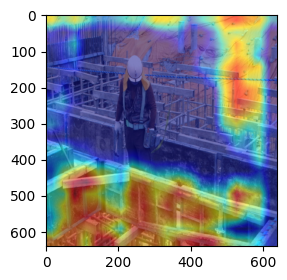

In [258]:
target_layers =[model.model.model[-2]] #8:12 #9:13, , 19, 22:18(basic), 25, -2, -5, -8

cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

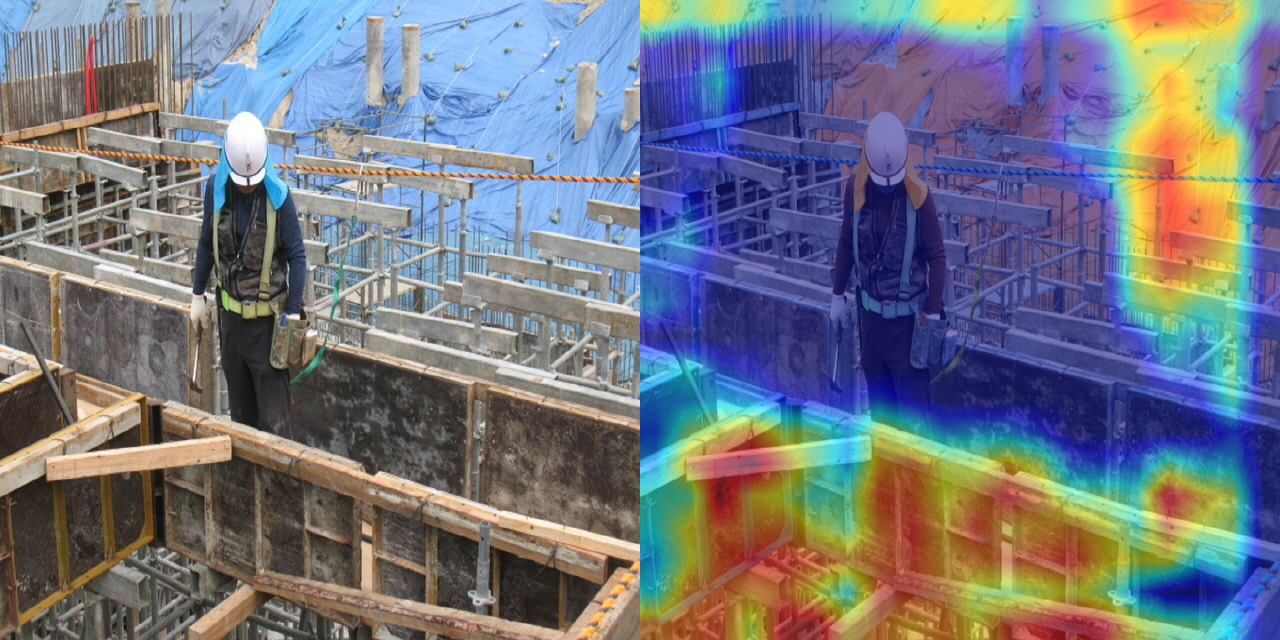

In [259]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))

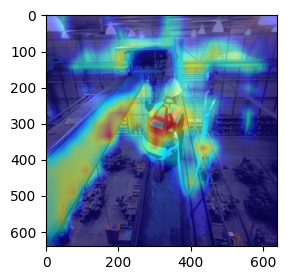

In [143]:
plt.imshow(cam_image)
plt.show()

In [144]:
cv2.imwrite('result/basic8.jpg', cv2.cvtColor(cam_image, cv2.COLOR_BGR2RGB))

True